<h1>Przygotowanie i przedstawienie danych</h1>
<h4>W zbiorze znajdują się dane zawierające 13 cech oraz wartość docelową, która opsiuje brak problemów z sercem (wartość 0) lub ich występowanie (wartości 1, 2, 3 oraz 4)</h4>

In [1]:
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

heart_disease = fetch_ucirepo(id=45) 
  
x = heart_disease.data.features 
y = heart_disease.data.targets 

print('\033[1mMetadane zbioru\033[0m')
print(heart_disease.metadata)
print("\n===========================================================================================\n")
print("\033[1mKolumny zbioru oraz ich charakterystyki\033[0m")
print(heart_disease.variables) 

Metadane zbioru
{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, 

<h1>Czy zbiór jest zbalansowany pod względem liczby próbek na klasy?</h1>
<h4>W zrównoważonym zbiorze danych liczby występujących wartości są mniej więcej równe. Dane znajdujące się w zbiorze możemy potraktować na dwa sposoby<br>1. Rozróżniając stopień problemów z sercem.
<br>2. Przyjmując klasyfikację binarną, która dzieli zbiór na rekordy z problemami z sercem (bez podziału na ich stopień) oraz bez nich.<br>Na podstawie poniższych wykresów można stwierdzić, że w przypadku wersji <b>klasyfikowanych w sposób domyślny dane nie są zbalansowane</b>, ale <b>dane klasyfikowane binarnie są prawie zbalansowane</b></h4>

Rozkład klas w zbiorze danych:
num
0      164
1       55
2       36
3       35
4       13
Name: count, dtype: int64


Rozkład klas w zbiorze danych przyjmujących klasyfikację binarną:
num
0      164
1      139
Name: count, dtype: int64


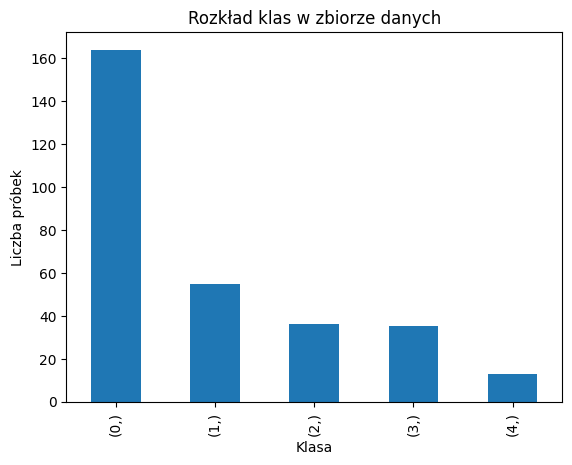

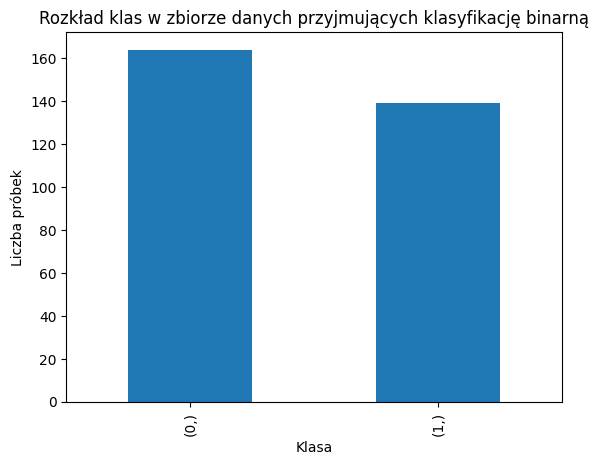

In [2]:
# Sprawdzenie unikalnych wartości w zmiennej docelowej i ich liczności
class_distribution = heart_disease.data.targets.value_counts()
class_distribution_normalised = heart_disease.data.targets.replace({1: 1, 2: 1, 3: 1, 4: 1}).value_counts() #tutaj stosując klasyfikacją binarną

print("\033[1mRozkład klas w zbiorze danych:\033[0m")
print(class_distribution)
print("\n===========================================================================================\n")
print("\033[1mRozkład klas w zbiorze danych przyjmujących klasyfikację binarną:\033[0m")
print(class_distribution_normalised)

# Wizualizacje
class_distribution.plot(kind='bar')
plt.title('Rozkład klas w zbiorze danych')
plt.xlabel('Klasa')
plt.ylabel('Liczba próbek')
plt.show()

class_distribution_normalised.plot(kind='bar')
plt.title('Rozkład klas w zbiorze danych przyjmujących klasyfikację binarną')
plt.xlabel('Klasa')
plt.ylabel('Liczba próbek')
plt.show()

<h1>Jakie są średnie i odchylenia cech liczbowych?</h1>
<h4>W zbiorze danych znajduje się 6 cechy liczbowych. Ich wartości średnie oraz odchylenia znajdują się poniżej.</h4>

In [3]:
numerical_values = heart_disease.data.features.iloc[:, [0,3,4,7,9,11]]
print('\033[1mCechy liczbowe\033[0m')
print(numerical_values)
print("\n===========================================================================================\n")
print('\033[1mWartości średnie cech liczbowych\033[0m')
print(numerical_values.mean())
print("\n===========================================================================================\n")
print('\033[1mOdchylenia cech liczbowych\033[0m')
print(numerical_values.std())

Cechy liczbowe
     age  trestbps  chol  thalach  oldpeak   ca
0     63       145   233      150      2.3  0.0
1     67       160   286      108      1.5  3.0
2     67       120   229      129      2.6  2.0
3     37       130   250      187      3.5  0.0
4     41       130   204      172      1.4  0.0
..   ...       ...   ...      ...      ...  ...
298   45       110   264      132      1.2  0.0
299   68       144   193      141      3.4  2.0
300   57       130   131      115      1.2  1.0
301   57       130   236      174      0.0  1.0
302   38       138   175      173      0.0  NaN

[303 rows x 6 columns]


Wartości średnie cech liczbowych
age          54.438944
trestbps    131.689769
chol        246.693069
thalach     149.607261
oldpeak       1.039604
ca            0.672241
dtype: float64


Odchylenia cech liczbowych
age          9.038662
trestbps    17.599748
chol        51.776918
thalach     22.875003
oldpeak      1.161075
ca           0.937438
dtype: float64


<h1>Dla cech liczbowych: czy ich rozkład jest w przybliżeniu normalny?</h1>
<h4>Rozkład cechy liczbowych <b>w połowie przypadków znacznie odbiega od rozkładu normalnego</b>. W druguiej połowie (dla cech <b>trestbps, chol</b> oraz w mniejszym stopniu <b>thalach</b>) rozkład nie jest normalny, lecz możemy uznać, że jest <b>satysfakcjonująco podobny</b>.</h4>

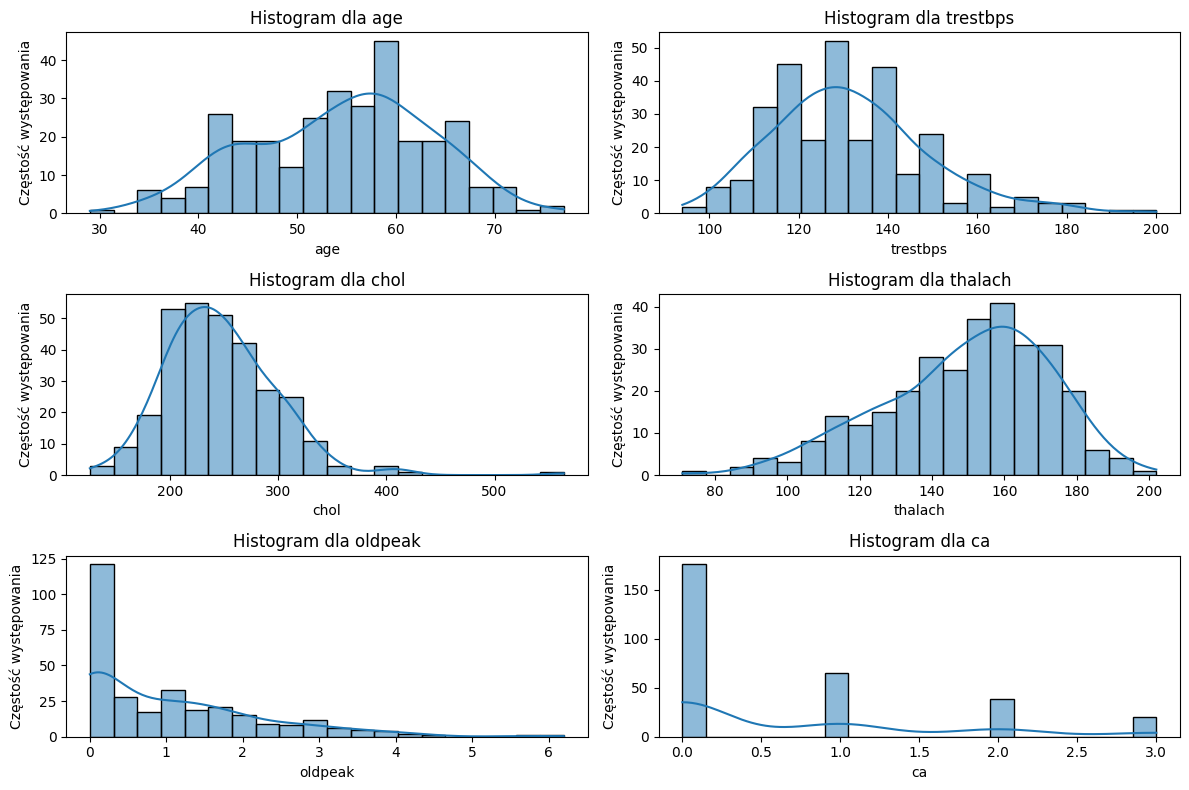

In [8]:
plt.figure(figsize=(12, 8))

for i, column in enumerate(numerical_values.columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(numerical_values[column], kde=True, bins=20)
    plt.title(f'Histogram dla {column}')
    plt.xlabel(column)
    plt.ylabel('Częstość występowania')

plt.tight_layout()
plt.show()

<h1>Dla cech kategorycznych: czy rozkład jest w przybliżeniu równomierny?</h1>
<h4>Rozkład równomierny to rozkład w którym jednakowe prawdopodobieństwo przypisane jest N różnym liczbom rzeczywistym. Na podstawie tej definicji możemy stwierdzić, że <b>żadna z przedstawionych cech nie jest równomierna</b>. Nie mniej jednak rozkład dla cechy <b>thal jest satysfakcjonująco blisko rozkładu równomiernego</b></h4>

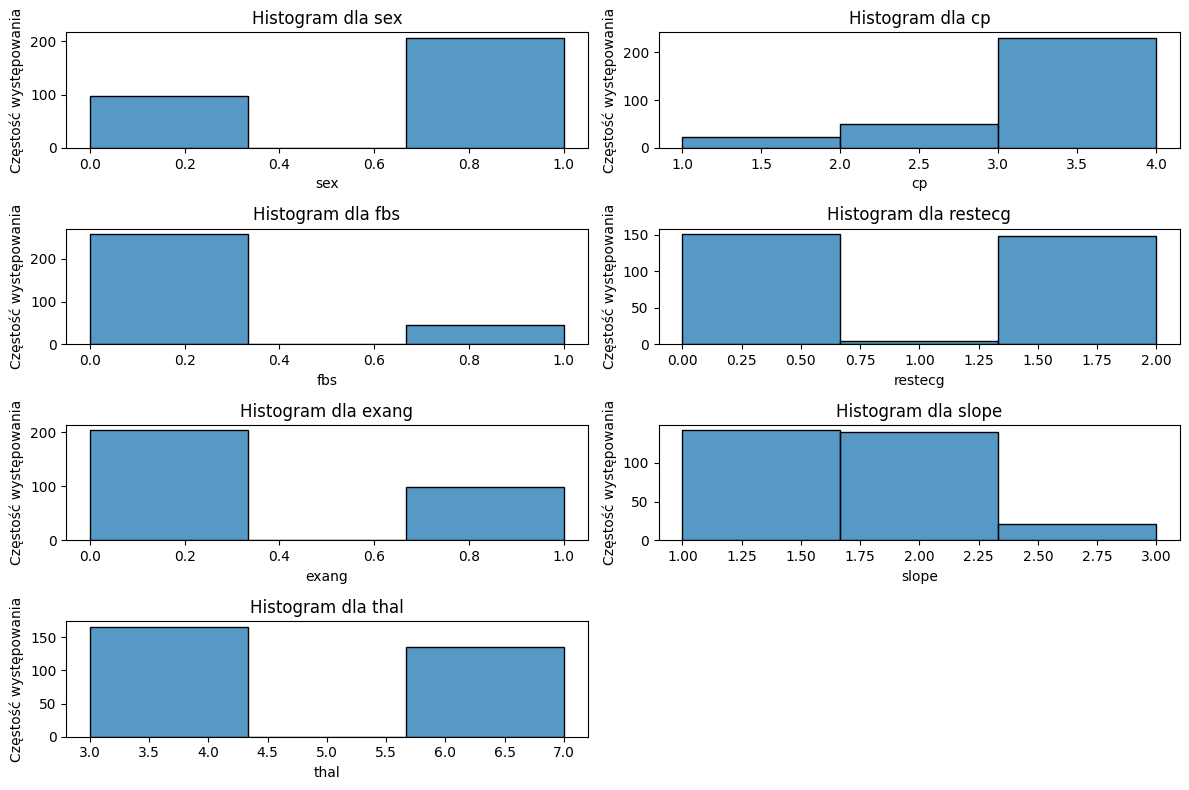

In [7]:
categorical_values = heart_disease.data.features.iloc[:, [1,2,5,6,8,10,12]]
plt.figure(figsize=(12, 8))

for i, column in enumerate(categorical_values.columns, 1):
    plt.subplot(4, 2, i)
    sns.histplot(categorical_values[column], bins=3)
    plt.title(f'Histogram dla {column}')
    plt.xlabel(column)
    plt.ylabel('Częstość występowania')

plt.tight_layout()
plt.show()

<h1>Czy występują cechy brakujące i jaką strategię możemy zastosować żeby je zastąpić?</h1>
<h4>W zbiorze występuje 6 rekordów z brakującymi cechami. Do problemu można podejść różnie, uzupełniając dane poprzez wstawienie wartości średniej, mediany lub poprzez próbę przewidzenia prawdziwej wartości. W naszym przypadku ze zględu na <b>względnie niewielką ilość rekordów z brakującymi cechami</b> najlepszym w mojej opinii wyjściem jest <b>pozbycie się tych danych</b></h4>


Dane PRZED usunięciem rekordów z brakującymi danymi
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  
0        3 

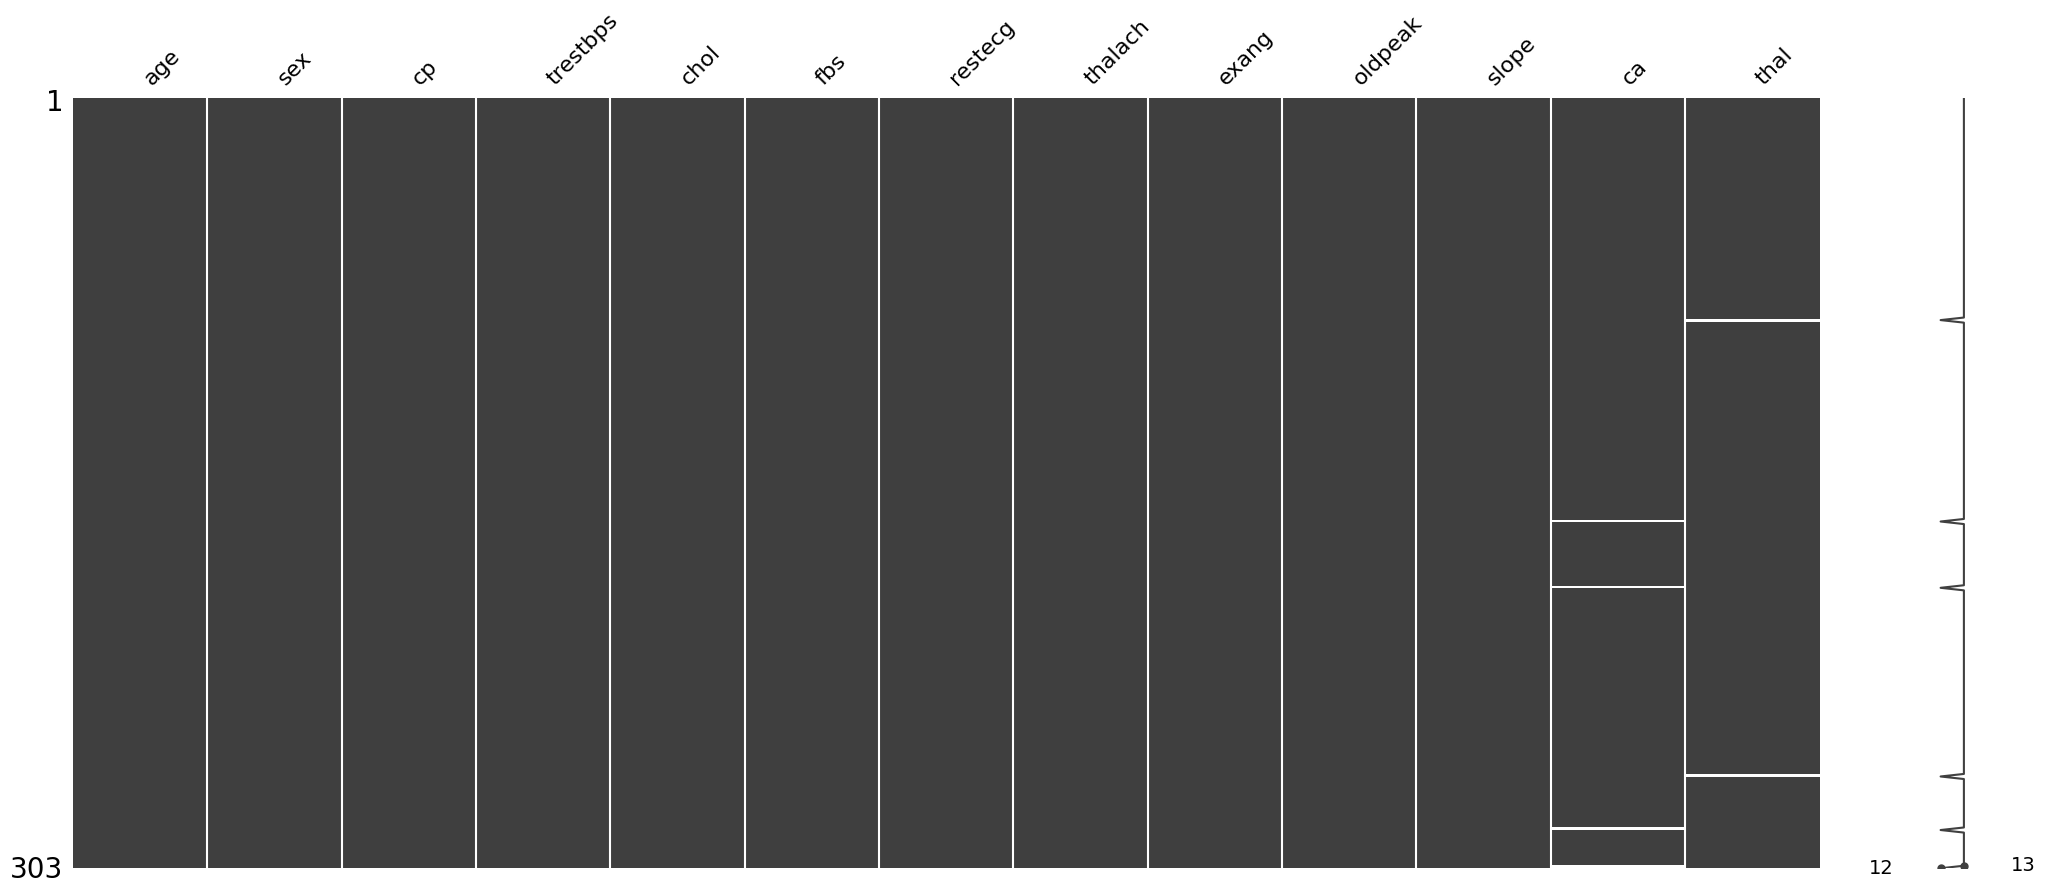



Dane PO usunięciem rekordów z brakującymi danymi
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
297   57    0   4       140   241    0        0      123      1      0.2   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   

     slope   ca  thal  
0        3  

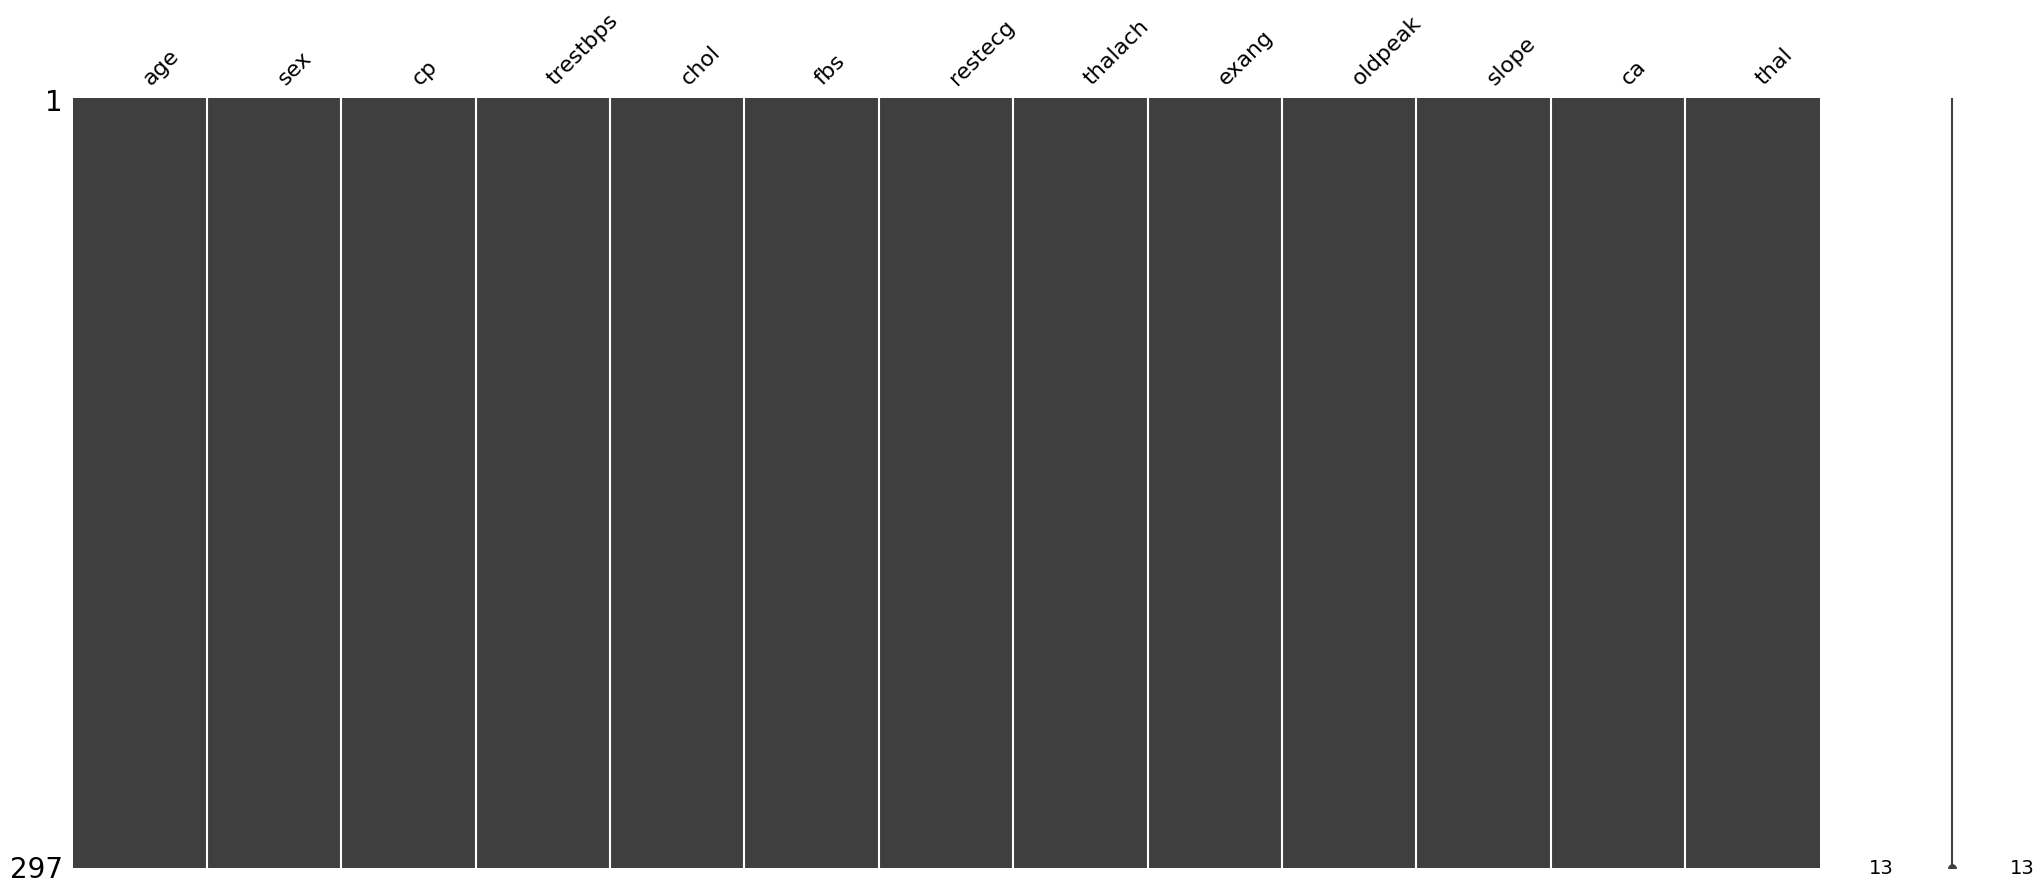

In [6]:
#Dane PRZED usunięciem rekordów z pustymi kolumnami
print("\033[1mDane PRZED usunięciem rekordów z brakującymi danymi\033[0m")
print(heart_disease.data.features)
missing_values = heart_disease.data.features.isnull().sum()
print("\033[1mBrakujące dane w każdej kolumnie:\033[0m")
print(missing_values)
msno.matrix(x)
plt.show()

print("\n===========================================================================================\n")
#Dane PO usunięciu rekordów z pustymi kolumnami
print("\033[1mDane PO usunięciem rekordów z brakującymi danymi\033[0m")
print(heart_disease.data.features.dropna())
print("\033[1mBrakujące dane w każdej kolumnie:\033[0m")
print(heart_disease.data.features.dropna().isnull().sum())
msno.matrix(heart_disease.data.features.dropna())
plt.show()